<a href="https://colab.research.google.com/github/AlokDhanush/sentiment_analysis/blob/main/Imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
len(train_data[0])

218

In [ ]:
len(train_data) + len(test_data)

50000

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value+3, key) for (key, value) in word_index.items()])

def decode(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
print(decode(train_data[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, value=0, padding='post', maxlen=256)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, value=0, padding='post', maxlen=256)

In [ ]:
len(train_data[0])

256

In [ ]:
print(decode(train_data[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
train_labels[0]

0

In [ ]:
print(decode(test_data[0]))

? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [ ]:
test_labels[0]

0

In [ ]:
model = tf.keras.Sequential([
          tf.keras.layers.Embedding(10000, 16),
          tf.keras.layers.GlobalAveragePooling1D(),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
val_data = train_data[:10000]
train_data = train_data[10000:]

val_labels = train_labels[:10000]
train_labels = train_labels[10000:]

In [ ]:
history = model.fit(train_data, train_labels, epochs=30, batch_size=512, validation_data=(val_data, val_labels), verbose=1)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5628 - loss: 0.6912 - val_accuracy: 0.6886 - val_loss: 0.6826
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6924 - loss: 0.6778 - val_accuracy: 0.7102 - val_loss: 0.6642
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7109 - loss: 0.6561 - val_accuracy: 0.7400 - val_loss: 0.6355
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7438 - loss: 0.6223 - val_accuracy: 0.7682 - val_loss: 0.5977
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7800 - loss: 0.5810 - val_accuracy: 0.7893 - val_loss: 0.5529
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8069 - loss: 0.5309 - val_accuracy: 0.8113 - val_loss: 0.5085
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8253 - loss: 0.4839 - val_accuracy: 0.8175 - val_loss: 0.4698
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8376 - loss: 0.4461 - val_accuracy: 0.8264 - val_los

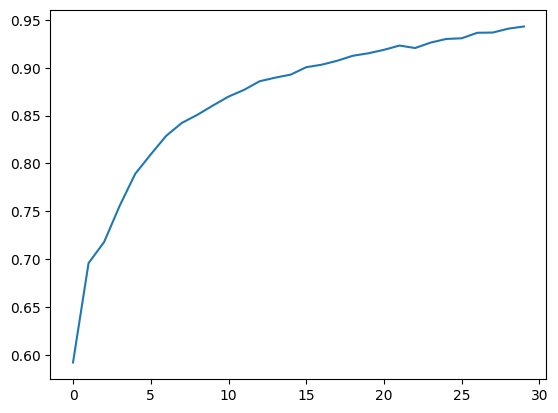

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
predicted = model.predict(test_data)

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


In [ ]:
model.evaluate(test_data, test_labels)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8818 - loss: 0.2912


[0.29478827118873596, 0.8802000284194946]

In [ ]:
predicted[0], test_labels[0]

(array([0.10558976], dtype=float32), 0)

In [ ]:
def predict_review(review, index = -1):
  review = tf.keras.preprocessing.sequence.pad_sequences([review], value=0, padding='post', maxlen=256)
  result = model.predict([review])
  if index != -1:
     print("Actual: ", test_labels[index])
  print("Predicted Confidence: ", result[0][0] )

In [ ]:
index = 7

predict_review(test_data[index], index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Actual:  0
Predicted:  0


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define max length (same as training)
max_length = 256

def encode_review(text):
    """Tokenize and encode a review into numerical format"""
    words = text.lower().split()
    encoded = [word_index.get(word, 2) for word in words]
    padded = pad_sequences([encoded], maxlen=max_length, padding='post')
    encoded_reshaped = padded.reshape((256,))
    return encoded_reshaped

In [ ]:
review = "Worst"
encoded = encode_review(review)

predict_review(encoded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Confidence:  0.25826308


In [ ]:
decode(train_data[8]), train_labels[8]

("? the remake of h b ? classic seventies chase film is simply horrible along with ? point gone in 60 seconds represent the quintessential car chase films the remake takes the original and stands it on its head whereas ? gave us 75 car chase and 25 supporting drama in ? 2000 we get 25 car chase and 75 supporting drama cage as super man saves his brother kisses the girl mtv edits tits and ass save your money rent the original at least ? didn't live to see his baby he wrote produced directed and starred in the ? film ? in this manner ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?",
 0)